<a href="https://colab.research.google.com/github/YogenderSingh07/ibm-ml-learning/blob/main/rain_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/weatherHistory.csv')
df['Precip Type'].unique()


array(['rain', 'snow', nan], dtype=object)

In [ ]:
df.drop('Formatted Date', axis=1, inplace=True)
df.drop('Summary', axis=1, inplace=True)
df.drop('Daily Summary', axis=1, inplace=True)

In [ ]:
def change_name(data):
  if data == 'rain':
    return 1
  else:
    return 0

df['Precip Type'] = df['Precip Type'].apply(change_name)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               96453 non-null  int64  
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Loud Cover                96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 6.6 MB


In [ ]:
df['Precip Type'].unique()

array([1, 0])

In [ ]:
#trimming data for prediction
test_data = df.iloc[80000:]
df = df.drop(test_data.index)

In [ ]:
test_output = test_data['Precip Type']
test_data = test_data[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Pressure (millibars)']]

In [ ]:
df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
79995,1,14.972222,14.972222,1.00,0.0000,0.0,2.0769,0.0,1017.81
79996,1,16.038889,16.038889,0.94,3.2200,90.0,3.1073,0.0,1017.71
79997,1,17.061111,17.061111,0.99,1.1914,271.0,6.2307,0.0,1017.81
79998,1,18.838889,18.838889,0.79,3.1717,188.0,7.9695,0.0,1017.79


In [ ]:
##FINDING FEATURES THAT AFFECT THE PRECIP TYPE MOST

x = df.drop('Precip Type', axis=1)
y = df['Precip Type']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train, y_train)
lr.score(x_test, y_test)
lr.coef_

array([[1.12963226e+01, 3.28507402e-01, 3.50688742e-01, 9.13911762e-02,
        1.12580621e-02, 1.67552548e-01, 0.00000000e+00, 1.30436238e-02]])

In [ ]:
df

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
79995,1,14.972222,14.972222,1.00,0.0000,0.0,2.0769,0.0,1017.81
79996,1,16.038889,16.038889,0.94,3.2200,90.0,3.1073,0.0,1017.71
79997,1,17.061111,17.061111,0.99,1.1914,271.0,6.2307,0.0,1017.81
79998,1,18.838889,18.838889,0.79,3.1717,188.0,7.9695,0.0,1017.79


In [ ]:
a = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Pressure (millibars)']]
b = df[['Precip Type']]

In [ ]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
a_train.shape, a_test.shape

((64000, 4), (16000, 4))

In [ ]:

a_train = sc.fit_transform(a_train)
a_test = sc.transform(a_test)
test_data = sc.transform(test_data)

In [ ]:
model = LogisticRegression()


In [ ]:
from sklearn.model_selection import GridSearchCV
#make sure the syntax is proper and the penalties are compatible with the solver
parameter ={'penalty':['l2'] , 'C':[0.001,0.01,0.1,1,10,100,1000],'max_iter':[100,200,1000]}

tuned_model = GridSearchCV(model,param_grid=parameter,cv=5,scoring='accuracy')

tuned_model.fit(a_train,b_train)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 1000], 'penalty': ['l2']},
             scoring='accuracy')

In [ ]:
tuned_model.score(a_train, b_train)


0.994578125

In [ ]:
tuned_model.score(a_test, b_test)

0.9935

In [ ]:
bpred = tuned_model.predict(a_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(bpred, b_test)
print(score)
print(classification_report(bpred , b_test ))

0.9935
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1939
           1       1.00      1.00      1.00     14061

    accuracy                           0.99     16000
   macro avg       0.99      0.98      0.98     16000
weighted avg       0.99      0.99      0.99     16000



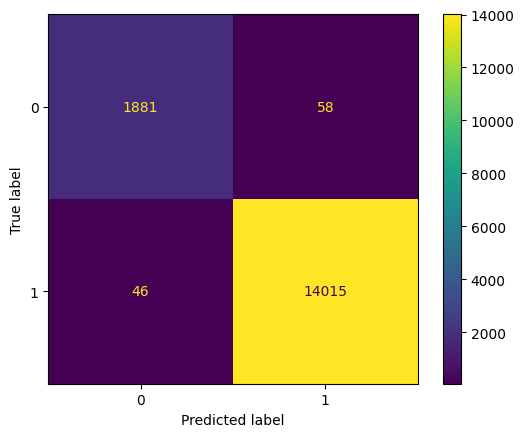

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(bpred, b_test)
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
from sklearn.preprocessing import StandardScaler
new_data = pd.read_csv('/content/weather_features_only.csv')

newdata_test_scaled = sc.transform(new_data)



In [ ]:
new_data_pred = tuned_model.predict(newdata_test_scaled)
new_data_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
dn = pd.read_csv('/content/weather_with_true_labels.csv')
y_true = dn['Rain']


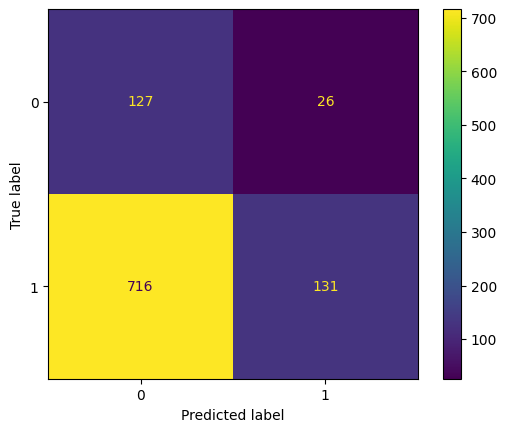

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(new_data_pred,y_true )
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
tuned_model.score(newdata_test_scaled, y_true)

0.258

In [ ]:
new_data_pred.mean()

np.float64(0.847)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(new_data_pred,y_true )
print(score)
print(classification_report(new_data_pred, y_true ))

0.258
              precision    recall  f1-score   support

           0       0.15      0.83      0.26       153
           1       0.83      0.15      0.26       847

    accuracy                           0.26      1000
   macro avg       0.49      0.49      0.26      1000
weighted avg       0.73      0.26      0.26      1000



In [ ]:
#now testing model on unseen data which is trimmed from our  original dataset
tuned_model.predict(test_data)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
tuned_model.score(test_data, test_output)

0.9738649486415851

In [ ]:
#performance of model on unseeen trimmed data

from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(test_output,tuned_model.predict(test_data))
print(score)
print(classification_report(test_output,tuned_model.predict(test_data)))

0.9738649486415851
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1691
           1       0.97      1.00      0.99     14762

    accuracy                           0.97     16453
   macro avg       0.97      0.88      0.92     16453
weighted avg       0.97      0.97      0.97     16453



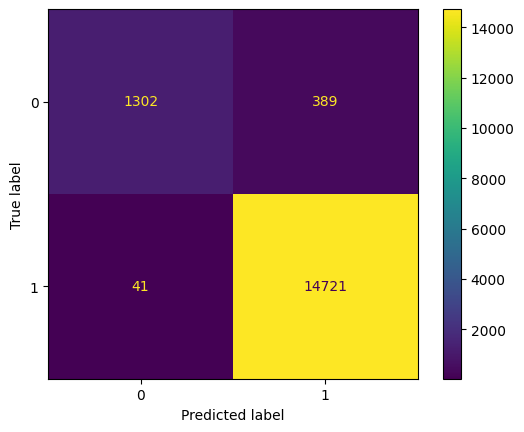

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_matrix = confusion_matrix(test_output,tuned_model.predict(test_data))
ConfusionMatrixDisplay(conf_matrix).plot()

In [ ]:
### Model Evaluation

### Train/Test Performance
#- Training Accuracy: 0.9992703392922  291 (99.92%)
#- Test Accuracy: 0.9995309568480301 (99.95%)

### Performance on randomly generated Unseen Data
#- Accuracy on new dataset: 0.251 (25.1%)

##PERFORMANCE on the unseen  trimmed dataset
# Accuracy on trimmed  dataset - 0.9738649486415851

### Discussion,
#The drop in accuracy on randomly generated unseen data is attributed to differences in data distribution and label generation logic between the training and new datasets.
